In [7]:
#Converting excel to json
import pandas as pd

#Reading excel file
read_excel=pd.read_excel("cancer_patients.xlsx",sheet_name='Sheet1')

#Converting and loading excel file into csv
write_into_csv=read_excel.to_json("cancer_patients.json",orient='records')

In [9]:
# #Check whether file exit or not
# import json
# with open("cancer_patients.json",'r+') as file:
#     r=json.load(file)
# print(r)

In [1]:
import pymongo

#Establish Connetion
conn=pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [2]:
#Connecting to database
cancer_db=conn['Cancer_Database']
print(cancer_db)

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database')


In [3]:
#Checking Database exist or not
if 'Cancer_Database' in conn.list_database_names():
    print("Cancer Database already exist")
else:
    print("Cancer Database does not exist")

Cancer Database already exist


In [3]:
#Creating Collection in database
collect=cancer_db['Cancer_Patients']
print(collect)

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database'), 'Cancer_Patients')


In [14]:
#Loading json file
import json
with open('cancer_patients.json') as file:
    file = json.load(file)
print(file)

[{'Patient Id': 'P1', 'Age': 33, 'Gender': 1, 'Air Pollution': 2, 'Alcohol use': 4, 'Dust Allergy': 5, 'OccuPational Hazards': 4, 'Genetic Risk': 3, 'chronic Lung Disease': 2, 'Balanced Diet': 2, 'Obesity': 4, 'Smoking': 3, 'Passive Smoker': 2, 'Chest Pain': 2, 'Coughing of Blood': 4, 'Fatigue': 3, 'Weight Loss': 4, 'Shortness of Breath': 2, 'Wheezing': 2, 'Swallowing Difficulty': 3, 'Clubbing of Finger Nails': 1, 'Frequent Cold': 2, 'Dry Cough': 3, 'Snoring': 4, 'Level': 'Low'}, {'Patient Id': 'P10', 'Age': 17, 'Gender': 1, 'Air Pollution': 3, 'Alcohol use': 1, 'Dust Allergy': 5, 'OccuPational Hazards': 3, 'Genetic Risk': 4, 'chronic Lung Disease': 2, 'Balanced Diet': 2, 'Obesity': 2, 'Smoking': 2, 'Passive Smoker': 4, 'Chest Pain': 2, 'Coughing of Blood': 3, 'Fatigue': 1, 'Weight Loss': 3, 'Shortness of Breath': 7, 'Wheezing': 8, 'Swallowing Difficulty': 6, 'Clubbing of Finger Nails': 2, 'Frequent Cold': 1, 'Dry Cough': 7, 'Snoring': 2, 'Level': 'Medium'}, {'Patient Id': 'P100', 'Age

In [15]:
#Inserting json file in Cancer_Database
if isinstance(file,list):
    collect.insert_many(file)
else:
    collect.insert_one(file)

In [5]:
#Checking 'Cancer_Patients' collection exit or not
print(cancer_db.list_collection_names())

['Breast_Cancer', 'Cancer_Patients', 'Lung_Cancer']


In [4]:
#Reading data from Cancer_Database 
cancer_mgd=collect.find({},{'_id':False}) #using '_id :False' we are not reading object id created by mongodb, we are reading only json file data

data=[x for x in cancer_mgd]
data

[{'Patient Id': 'P1',
  'Age': 33,
  'Gender': 1,
  'Air Pollution': 2,
  'Alcohol use': 4,
  'Dust Allergy': 5,
  'OccuPational Hazards': 4,
  'Genetic Risk': 3,
  'chronic Lung Disease': 2,
  'Balanced Diet': 2,
  'Obesity': 4,
  'Smoking': 3,
  'Passive Smoker': 2,
  'Chest Pain': 2,
  'Coughing of Blood': 4,
  'Fatigue': 3,
  'Weight Loss': 4,
  'Shortness of Breath': 2,
  'Wheezing': 2,
  'Swallowing Difficulty': 3,
  'Clubbing of Finger Nails': 1,
  'Frequent Cold': 2,
  'Dry Cough': 3,
  'Snoring': 4,
  'Level': 'Low'},
 {'Patient Id': 'P10',
  'Age': 17,
  'Gender': 1,
  'Air Pollution': 3,
  'Alcohol use': 1,
  'Dust Allergy': 5,
  'OccuPational Hazards': 3,
  'Genetic Risk': 4,
  'chronic Lung Disease': 2,
  'Balanced Diet': 2,
  'Obesity': 2,
  'Smoking': 2,
  'Passive Smoker': 4,
  'Chest Pain': 2,
  'Coughing of Blood': 3,
  'Fatigue': 1,
  'Weight Loss': 3,
  'Shortness of Breath': 7,
  'Wheezing': 8,
  'Swallowing Difficulty': 6,
  'Clubbing of Finger Nails': 2,
  'Frequ

In [1]:
#Establishing connection with mysql
import mysql
import mysql.connector

db=mysql.connector.connect(host="localhost",user="root",passwd="root")

In [2]:
#Creating Database
curs=db.cursor()
try:
    curs.execute("CREATE DATABASE Cancer_mysql")
except:
    print("Database already exist")

Database already exist


In [3]:
#Check database exist or not
curs.execute("SHOW DATABASES")
curs

In [4]:
databases=[x for x in curs]
databases #'cancer_mysql database existed'

[('cancer_mysql',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sys',),
 ('world',)]

In [5]:
curs.execute("USE cancer_mysql")

In [16]:
#Inserting mongodb data in mysql
#curs.execute('drop table cancer_patients_mysql')
result=curs.execute("create table if not exists cancer_patients_mysql (Patient_Id varchar(12),Age int,Gender int,Air_Pollution int,Alcohol_use int,Dust_Allergy int,OccuPational_Hazards int,Genetic_Risk int,chronic_Lung_Disease int,Balanced_Diet int,Obesity int,Smoking int,Passive_Smoker int,Chest_Pain int,Coughing_of_Blood int,Fatigue int,Weight_Loss int,Shortness_of_Breath int,Wheezing int,Swallowing_Difficulty int,Clubbing_of_Finger_Nails int,Frequent_Cold int,Dry_Cough int,Snoring int,Level varchar(12))")

In [24]:
#Checking tables exist or not
curs.execute("SHOW TABLES")
tables=[x for x in curs]
tables #'cancer_patients_mysql table existed'

[('breast_cancer_mysql',), ('cancer_patients_mysql',), ('lung_cancer_mysql',)]

In [17]:
i=0
for x in data:
    Patient_Id= x.get('Patient Id')
    Age= x.get('Age')
    Gender= x.get('Gender')
    Air_Pollution= x.get('Air Pollution')
    Alcohol_use= x.get('Alcohol use')
    Dust_Allergy= x.get('Dust Allergy')
    OccuPational_Hazards= x.get('OccuPational Hazards')
    Genetic_Risk= x.get('Genetic Risk')
    chronic_Lung_Disease= x.get('chronic Lung Disease')
    Balanced_Diet= x.get('Balanced Diet')
    Obesity= x.get('Obesity')
    Smoking = x.get('Smoking')
    Passive_Smoker = x.get('Passive Smoker')
    Chest_Pain = x.get('Chest Pain')
    Coughing_of_Blood = x.get('Coughing of Blood')
    Fatigue = x.get('Fatigue')
    Weight_Loss = x.get('Weight Loss')
    Shortness_of_Breath = x.get('Shortness of Breath')
    Wheezing = x.get('Wheezing')
    Swallowing_Difficulty = x.get('Swallowing Difficulty')
    Clubbing_of_Finger_Nails = x.get('Clubbing of Finger Nails')
    Frequent_Cold = x.get('Frequent Cold')
    Dry_Cough = x.get('Dry Cough')
    Snoring = x.get('Snoring')
    Level = x.get('Level')
        
    sql = "INSERT INTO cancer_patients_mysql (Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    val = (Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level)
    curs.execute(sql, val)
    i+=1
db.commit()

In [6]:
#Reading data from mysql
curs.execute('select * from cancer_patients_mysql')
patients_db=[x for x in curs]
db.close()   #Closing of database connection

In [89]:
#Using dataframe we can do analysis 
import pandas as pd

cancer_patients=pd.DataFrame(patients_db,columns=['Patient_Id','Age','Gender','Air_Pollution','Alcohol_use','Dust_Allergy','OccuPational_Hazards','Genetic_Risk','chronic_Lung_Disease','Balanced_Diet','Obesity','Smoking','Passive_Smoker','Chest_Pain','Coughing_of_Blood','Fatigue','Weight_Loss','Shortness_of_Breath','Wheezing','Swallowing_Difficulty','Clubbing_of_Finger_Nails','Frequent_Cold','Dry_Cough','Snoring','Level'])

In [90]:
cancer_patients.head()

,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [91]:
cancer_patients.shape

(1000, 25)

In [92]:
cancer_patients.describe()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [93]:
cancer_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient_Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air_Pollution             1000 non-null   int64 
 4   Alcohol_use               1000 non-null   int64 
 5   Dust_Allergy              1000 non-null   int64 
 6   OccuPational_Hazards      1000 non-null   int64 
 7   Genetic_Risk              1000 non-null   int64 
 8   chronic_Lung_Disease      1000 non-null   int64 
 9   Balanced_Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive_Smoker            1000 non-null   int64 
 13  Chest_Pain                1000 non-null   int64 
 14  Coughing_of_Blood        

In [94]:
#Categorical Data
cancer_patients_cat=cancer_patients.select_dtypes(include='object')

In [95]:
cancer_patients_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_Id  1000 non-null   object
 1   Level       1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [96]:
#Numerical Data
cancer_patients_num=cancer_patients.select_dtypes(include='number')

In [97]:
cancer_patients_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air_Pollution             1000 non-null   int64
 3   Alcohol_use               1000 non-null   int64
 4   Dust_Allergy              1000 non-null   int64
 5   OccuPational_Hazards      1000 non-null   int64
 6   Genetic_Risk              1000 non-null   int64
 7   chronic_Lung_Disease      1000 non-null   int64
 8   Balanced_Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive_Smoker            1000 non-null   int64
 12  Chest_Pain                1000 non-null   int64
 13  Coughing_of_Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

<AxesSubplot:>

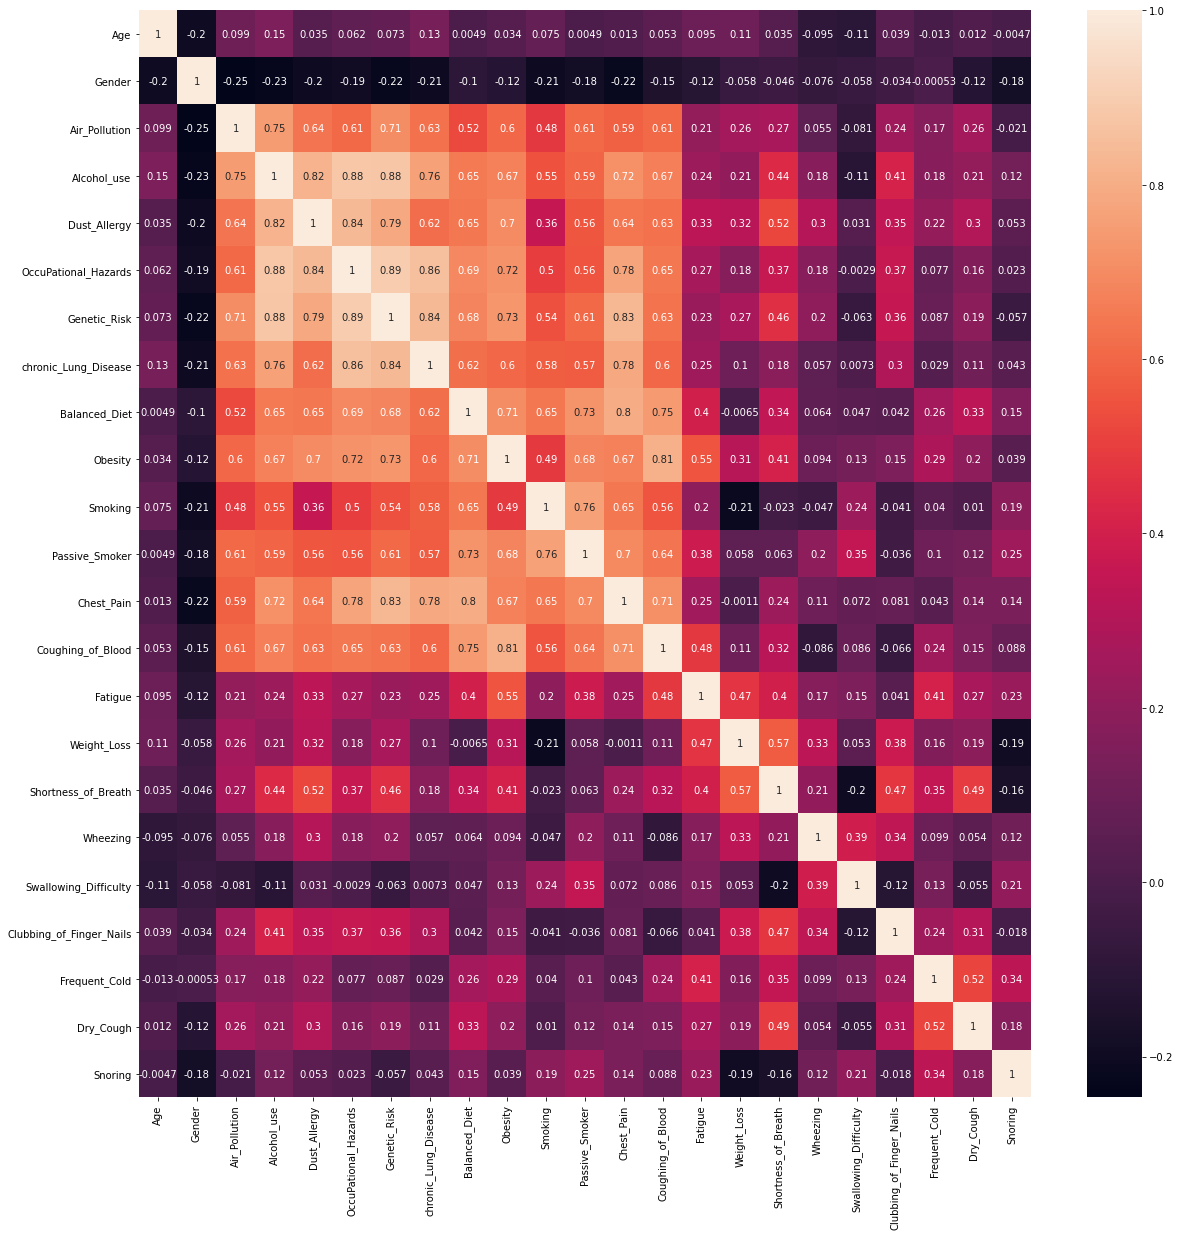

In [103]:
#Correltion between numerical variables
plt.figure(figsize=(20,20))
sns.heatmap(cancer_patients_num.corr(),annot=True)

In [104]:
#Checking how many unique values present in each columns of numerical datasets
z=pd.DataFrame(cancer_patients_num.apply(lambda x: x.value_counts().count()))
z.columns=['unique_values']
z

,unique_values
Age,40
Gender,2
Air_Pollution,8
Alcohol_use,8
Dust_Allergy,8
OccuPational_Hazards,8
Genetic_Risk,7
chronic_Lung_Disease,7
Balanced_Diet,7
Obesity,7


In [105]:
# from above we can say that features AreaQ,Alkhol,family_history and Result should be categorical because there unique values are less than 10.
y=z.loc[z['unique_values']<=10]
ls=y.index
#converting to categorigal form
cat=cancer_patients_num.loc[:,ls].astype('object')
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1000 non-null   object
 1   Air_Pollution             1000 non-null   object
 2   Alcohol_use               1000 non-null   object
 3   Dust_Allergy              1000 non-null   object
 4   OccuPational_Hazards      1000 non-null   object
 5   Genetic_Risk              1000 non-null   object
 6   chronic_Lung_Disease      1000 non-null   object
 7   Balanced_Diet             1000 non-null   object
 8   Obesity                   1000 non-null   object
 9   Smoking                   1000 non-null   object
 10  Passive_Smoker            1000 non-null   object
 11  Chest_Pain                1000 non-null   object
 12  Coughing_of_Blood         1000 non-null   object
 13  Fatigue                   1000 non-null   object
 14  Weight_Loss              

In [106]:
cancer_patients_cat=pd.concat([cancer_patients_cat,cat],axis=1,join='inner')
cancer_patients_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient_Id                1000 non-null   object
 1   Level                     1000 non-null   object
 2   Gender                    1000 non-null   object
 3   Air_Pollution             1000 non-null   object
 4   Alcohol_use               1000 non-null   object
 5   Dust_Allergy              1000 non-null   object
 6   OccuPational_Hazards      1000 non-null   object
 7   Genetic_Risk              1000 non-null   object
 8   chronic_Lung_Disease      1000 non-null   object
 9   Balanced_Diet             1000 non-null   object
 10  Obesity                   1000 non-null   object
 11  Smoking                   1000 non-null   object
 12  Passive_Smoker            1000 non-null   object
 13  Chest_Pain                1000 non-null   object
 14  Coughing_of_Blood        

In [107]:
slice2=z.loc[z['unique_values']>10]
num=slice2.index
cancer_patients_num=cancer_patients_num.loc[:,num]
cancer_patients_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [108]:
#Combine new dataset is 'cancer_patients_new'
cancer_patients_new=pd.concat([cancer_patients_num,cancer_patients_cat],axis=1,join='inner')

In [109]:
#Checking null or missing values in dataset
cancer_patients_num.isnull().sum()

Age    0
dtype: int64

In [110]:
cancer_patients_num.isna().sum()

Age    0
dtype: int64

In [111]:
#Outlier prediction is not required because numerical dataset contain one numerical variable i.e Age.

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

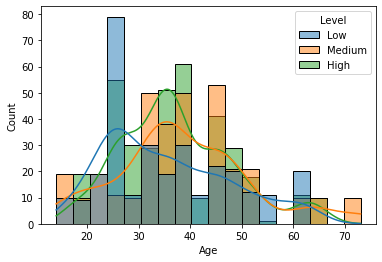

In [113]:
sns.histplot(data=cancer_patients,x='Age',hue='Level',stat='count',kde='true')
plt.show()

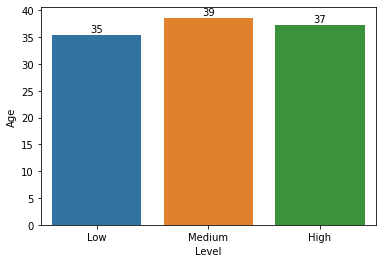

In [114]:
# #Showing the relation between Age and cancer levels
ax=sns.barplot(x='Level',y='Age',data=cancer_patients,ci=0)
# label each bar in barplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height+0.5, s = '{:.0f}'.format(height),ha = 'center')
plt.show()

In [115]:
labels=['young','Adult','Old']
bins=[0,18,50,100]
cancer_patients['Age_Rank']=pd.cut(cancer_patients['Age'],bins=bins,labels=labels)
cancer_patients.head()

,Patient_Id,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,...,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level,Age_Rank
0,P1,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,Adult
1,P10,17,1,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,Medium,young
2,P100,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,Adult
3,P1000,37,1,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,Adult
4,P101,46,1,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,Adult


In [116]:
# Checking level of cancer belong to which age categorires
import numpy as np
new=cancer_patients[['Age_Rank','Level']].groupby(['Age_Rank']).count()
new['Level_percentage']=new.apply(lambda x: np.round((x/np.sum(new['Level']))*100,2))
new

,Level,Level_percentage
Age_Rank,,
young,47,4.7
Adult,819,81.9
Old,134,13.4


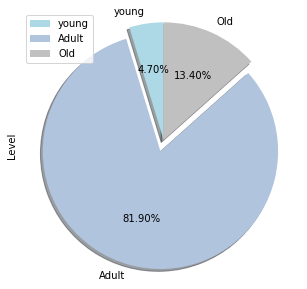

In [117]:
colors = ['lightblue','lightsteelblue','silver']
explode = (0, 0.1, 0)
new.plot.pie(y='Level', figsize=(5, 5),autopct='%1.2f%%', startangle=90, shadow = True, colors=colors, explode=explode)
plt.axis('equal')
plt.show()

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


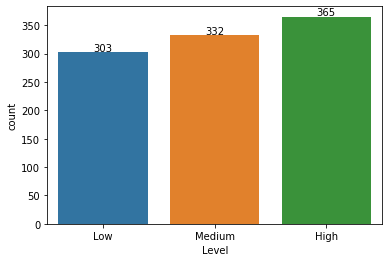

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


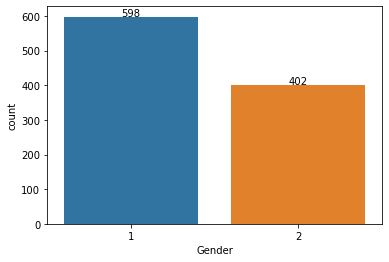

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


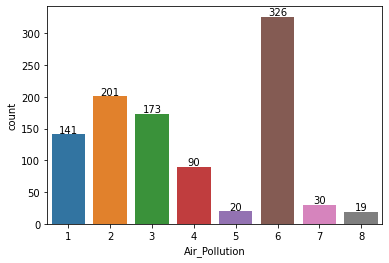

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


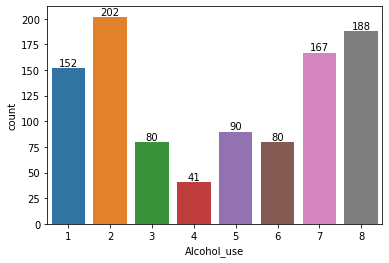

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


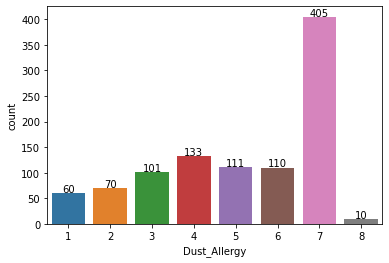

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


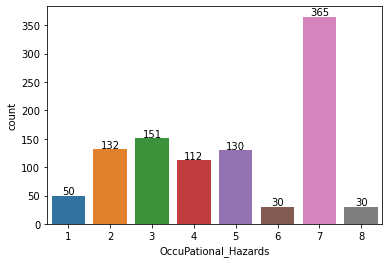

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


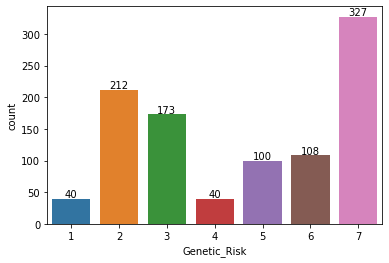

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


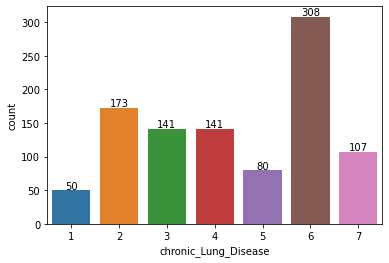

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


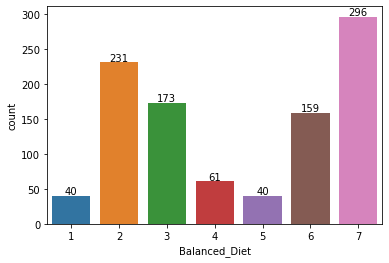

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


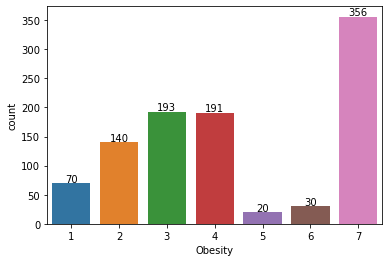

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


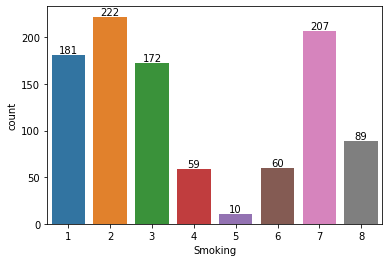

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


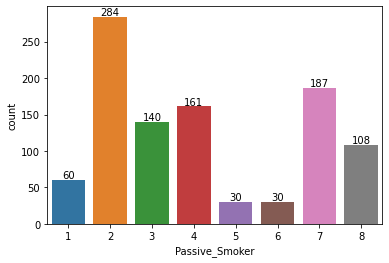

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


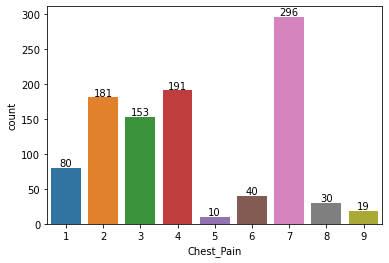

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


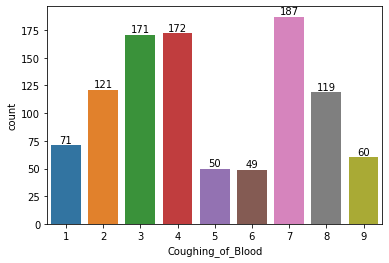

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


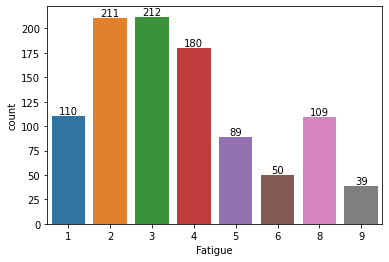

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


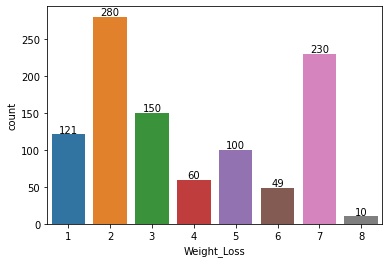

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


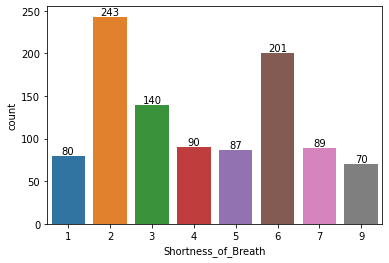

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


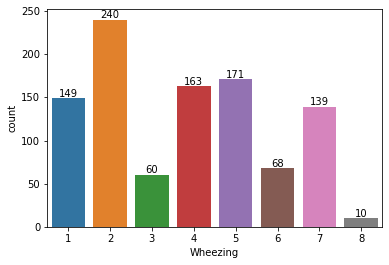

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


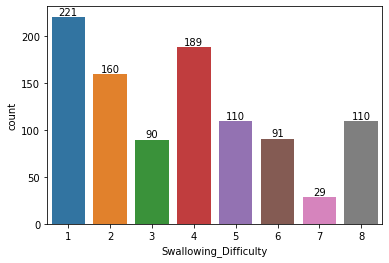

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


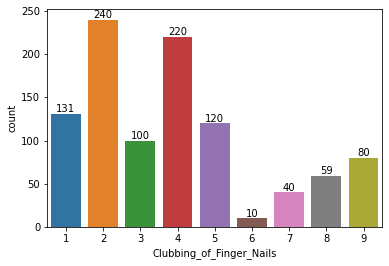

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


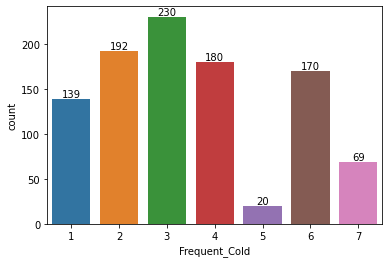

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


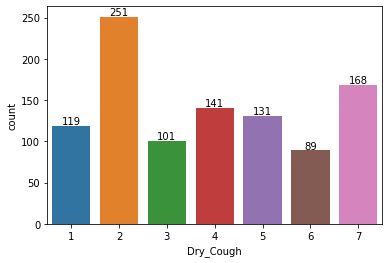

C:\Users\sbtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


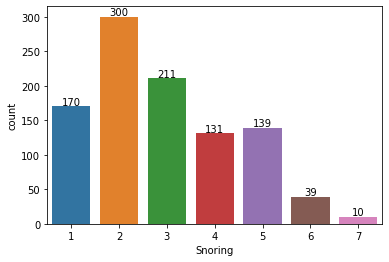

In [118]:
#checking the variance (different values of count ) in categorical variable
cancer_patients_cat_new=cancer_patients_cat.drop('Patient_Id',axis=1)
for x in cancer_patients_cat_new.columns:
    ax=sns.countplot(x,data=cancer_patients_cat_new)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x()+(p.get_width()/2),y = height+2.0, s = '{:.0f}'.format(height),ha = 'center')
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


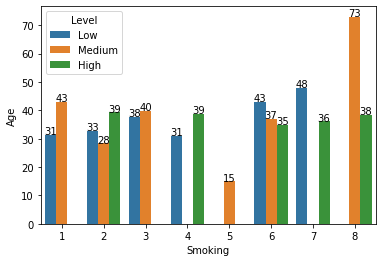

In [119]:
#Showing the result between Alkhol and Smokes and cancer level.
ax=sns.barplot(x="Smoking", y="Age", data=cancer_patients,hue="Level",ci=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height+0.2, s = '{:.0f}'.format(height),ha = 'center')
plt.show()

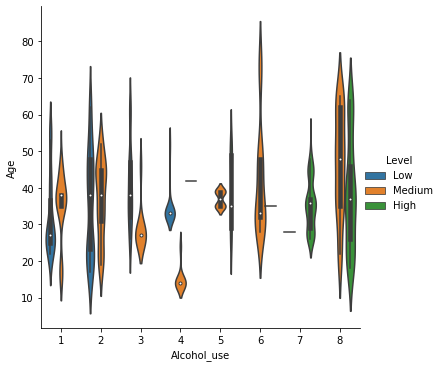

In [120]:
sns.catplot(data=cancer_patients,x='Alcohol_use',y='Age',hue='Level',kind='violin')
plt.show()

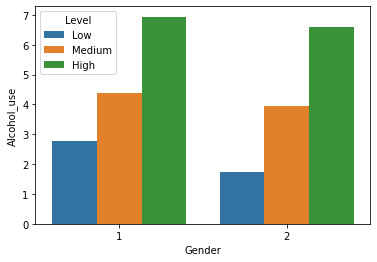

In [121]:
#Showing level of cancer due to alchol use
ax=sns.barplot(data=cancer_patients_cat,x='Gender',y='Alcohol_use',hue='Level',ci=0)
plt.show()

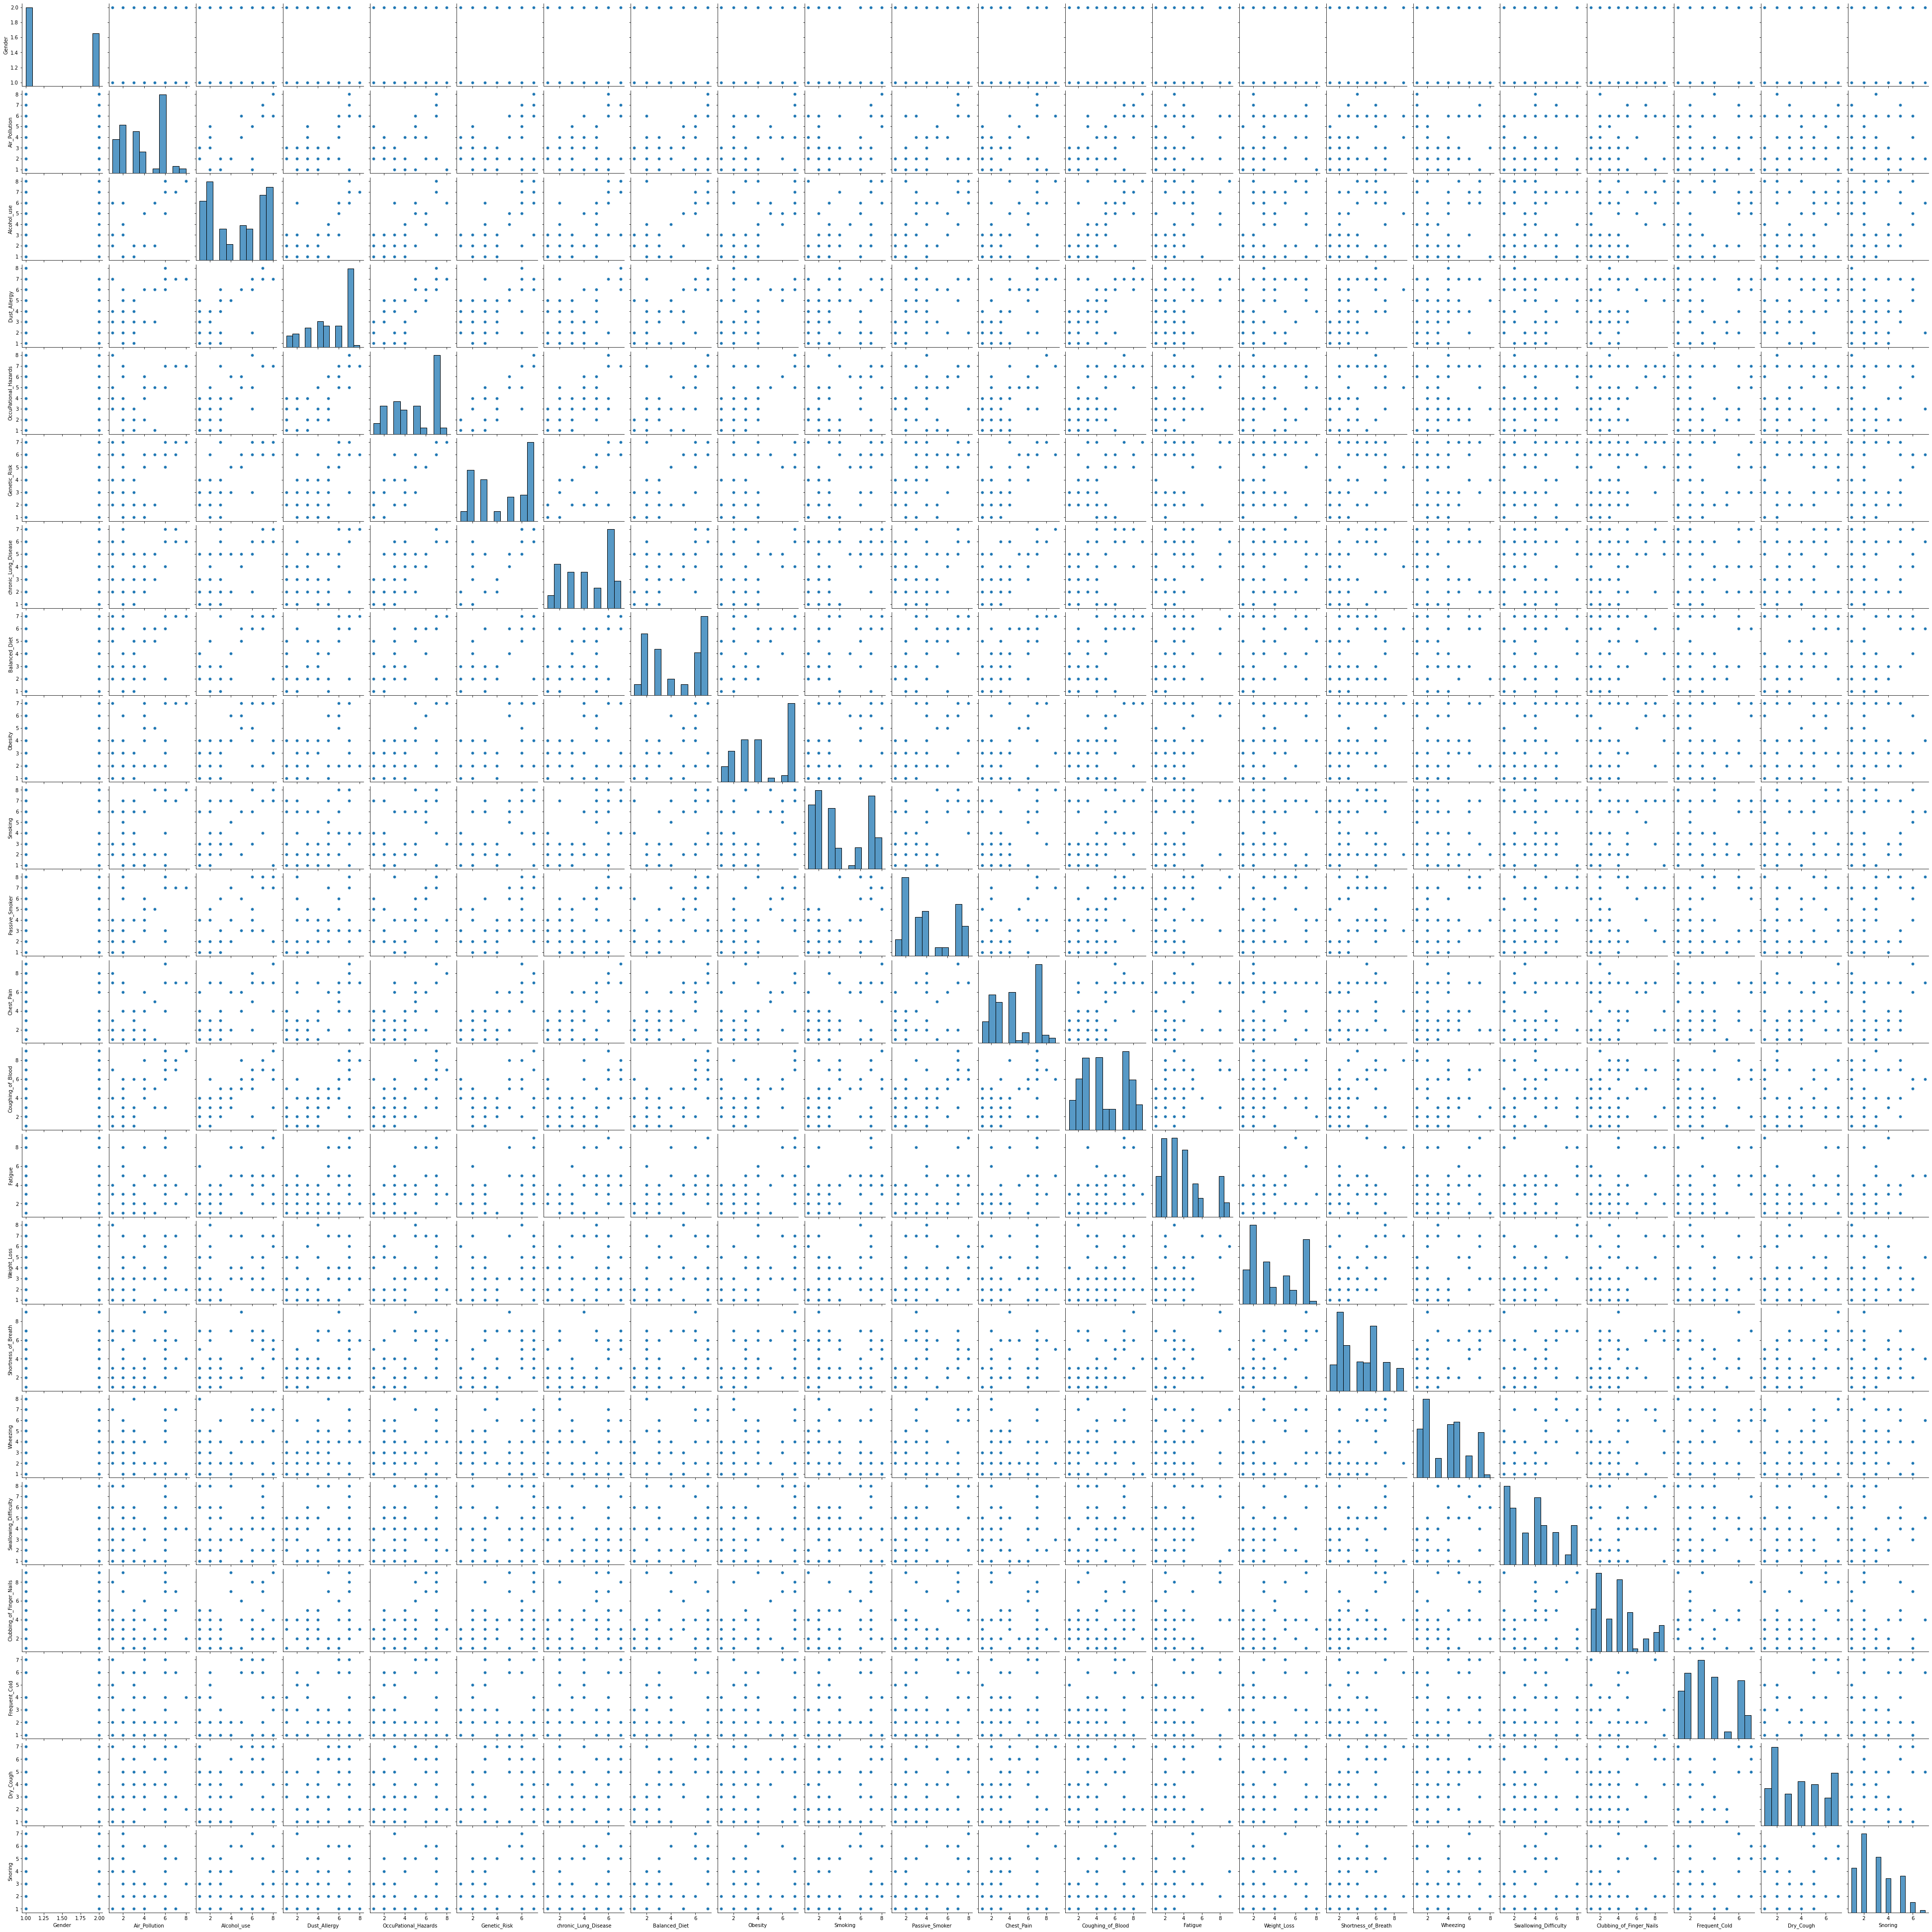

In [123]:
#Relation different features to each other.
sns.pairplot(data=cancer_patients_cat)
plt.show()